### Assignment 1
Juliann Weir-Jackson  

**Question 1**<br>
Find a formula for the exact gradient of the sum of squares loss function based on a 
linearregression model with d+ 1 weights.<br>
![alt text](NN_hw1_q1up.png)

**Question 2**<br>
Write an implementation of linear regression by gradient descent using the exact gradient
formula instead of a function approximating the gradient (e.g.computeGradient).

In [524]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas as pd

# increase the width of boxes in the notebook file (this is only cosmetic)
np.set_printoptions(linewidth=180)

In [611]:
class LeastSquaresGradient:
    
    # fit the model to the data
    def fit(self, X, y, w0, alpha, h, tolerance, maxIterations):
        self.n = X.shape[0]
        self.d = X.shape[1]
        self.h = h
        self.alpha = alpha
        self.initialGuess = w0
        
        # save the training data
        self.data = np.hstack((np.ones([self.n, 1]), X))
        print(self.data.shape)
        # save the training labels
        self.outputs = y
        
        # find the w values that minimize the sum of squared errors via gradient descent
        X = self.data
        L = lambda w: ((X @ w).T - y.T) @ (X @ w - y)
        self.w = self.gradientDescent(L, self.initialGuess, self.alpha, self.h, tolerance, maxIterations)
                
    # predict the output from testing data
    def predict(self, X):
        # initialize an empty matrix to store the predicted outputs
        yPredicted = np.empty([X.shape[0],1])
        
        # append a column of ones at the beginning of X
        X = np.hstack((np.ones([X.shape[0],1]), X))
        
        # apply the function f with the values of w from the fit function to each testing datapoint (rows of X)
        for row in range(X.shape[0]):
            yPredicted[row] = self.w @ X[row,]
            
        return yPredicted

    # run gradient descent to minimize the loss function
    def gradientDescent(self, f, x0, alpha, h, tolerance, maxIterations):
        # set x equal to the initial guess
        x = x0
        x=np.array(x0).T
        x = x.astype('float64')
        # take up to maxIterations number of steps
        for counter in range(maxIterations):
            # update the gradient
            #gradient was calculated by taking the derivative with respect to w of the loss function 
            gradient= (2 * self.data.T @ self.data @ x)- 2 * (self.data.T @ y)
            # stop if the norm of the gradient is near 0
            if np.linalg.norm(gradient) < tolerance:
                print('Gradient descent took', counter, 'iterations to converge')
                print('The norm of the gradient is', np.linalg.norm(gradient))
                # return the approximate critical value x
                return x

            # if we do not converge, print a message
            elif counter == maxIterations-1:
                print("Gradient descent failed")
                print('The gradient is', gradient)
                # return x, sometimes it is still pretty good
                return x

            # take a step in the opposite direction as the gradient
            x -= alpha*gradient
            

## Test

Fitting the model...

(5, 2)
Gradient descent took 17878 iterations to converge
The norm of the gradient is 0.00999972660398684

The predicted y values are [1.85719691 2.38847861 2.91976031 3.451042   2.38847861]
The real y values are [1 2 3 3 4]
The w values are [-1.33049327  0.5312817 ]

The r^2 score is 0.28988833341392417
The mean squared error is 0.738516133249519
The mean absolute error is 0.6776957218853955 



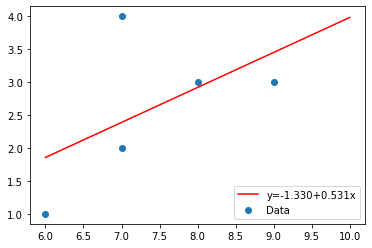

In [612]:
X = np.array([[6], [7], [8], [9], [7]])
y = np.array([1, 2, 3, 3, 4])

# instantiate an least squares object, fit to data, predict data
model = LeastSquaresGradient()

print('Fitting the model...\n')
model.fit(X, y, [0, 0], alpha = 0.001, h = 0.001, tolerance = 0.01, maxIterations = 100000)

predictions = model.predict(X)

# print the predictions
print('\nThe predicted y values are', predictions.T[0])

# print the real y values
print('The real y values are', y)

# print the w values
parameters = model.w
print('The w values are', parameters)

# plot the training points
plt.scatter(X, y, label = 'Data')

# plot the fitted model with the data
xModel = np.linspace(6,10,100)
yModel = parameters[0] + parameters[1]*xModel

# write a string for the formula
lineFormula = 'y={:.3f}+{:.3f}x'.format(parameters[0], parameters[1])

# plot the model
plt.plot(xModel, yModel, 'r', label = lineFormula)

# add a legend
plt.legend()

# return quality metrics
print('\nThe r^2 score is', r2_score(y, predictions))
print('The mean squared error is', mean_squared_error(y, predictions))
print('The mean absolute error is', mean_absolute_error(y, predictions),'\n')

**Question 3**<br>
Add elastic-net regularization to your implementation.  Hyperparameters λ1 and λ2 should be inputs 
to the class or thefitfunction. [Hint.Don’t forget to adjust the gradient calculation.]


In [636]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas as pd

# increase the width of boxes in the notebook file (this is only cosmetic)
np.set_printoptions(linewidth=180)

In [650]:
class LeastSquaresGradient:
        
    # fit the model to the data
    def fit(self, X, y, w0, alpha, h, tolerance, maxIterations,l1,l2):
        self.n = X.shape[0]
        self.d = X.shape[1]
        self.h = h
        self.alpha = alpha
        self.initialGuess = w0
        self.l1=l1;
        self.l2=l2;
        #print("this is ok")
        # save the training data
        self.data = np.hstack((np.ones([self.n, 1]), X))
        #print(self.data.shape)
        # save the training labels
        self.outputs = y
        
        # find the w values that minimize the sum of squared errors via gradient descent
        X = self.data
        #Elastic net regularization was added to the original loss function
        L = lambda w: ((X @ w).T - y.T) @ (X @ w - y)+ self.l1 *np.sum(np.abs(w)) + self.l2 * w.T @ w
        self.w = self.gradientDescent(L, self.initialGuess, self.alpha, self.h, tolerance, maxIterations)
                
    # predict the output from testing data
    def predict(self, X):
        # initialize an empty matrix to store the predicted outputs
        yPredicted = np.empty([X.shape[0],1])
        
        # append a column of ones at the beginning of X
        X = np.hstack((np.ones([X.shape[0],1]), X))
        
        # apply the function f with the values of w from the fit function to each testing datapoint (rows of X)
        for row in range(X.shape[0]):
            yPredicted[row] = self.w @ X[row,]
            
        return yPredicted

    # run gradient descent to minimize the loss function
    def gradientDescent(self, f, x0, alpha, h, tolerance, maxIterations):
        # set x equal to the initial guess
        x = x0
        x=np.array(x0).T
        x = x.astype('float64')
        # take up to maxIterations number of steps
        for counter in range(maxIterations):
            # update the gradient
            # Since the differential of an absolute value cannot be found a a thrshold is set
            #that test each element in x with the number 0.0000000001 in order to select a value of either 
            #0,1,-1 to be used in the calculation of the gradient 
            for ele in x:
                if abs(ele) < 0.0000000001:
                    appl= 0
                if abs(ele) > 0.0000000001:
                    appl= x/abs(x)
            gradient= (2 * self.data.T @ self.data @ x)- 2 * (self.data.T @ self.outputs)+ 2 *self.l2 * x + self.l1 * appl
            # stop if the norm of the gradient is near 0
            if np.linalg.norm(gradient) < tolerance:
                print('Gradient descent took', counter, 'iterations to converge')
                print('The norm of the gradient is', np.linalg.norm(gradient))
                # return the approximate critical value x
                return x

            # if we do not converge, print a message
            elif counter == maxIterations-1:
                print("Gradient descent failed")
                print('The gradient is', gradient)
                # return x, sometimes it is still pretty good
                return x

            # take a step in the opposite direction as the gradient
            x -= alpha*gradient

Fitting the model...

Gradient descent took 16096 iterations to converge
The norm of the gradient is 0.009998711837767817

The predicted y values are [1.88588374 2.39844547 2.9110072  3.42356892 2.39844547]
The real y values are [1 2 3 3 4]
The w values are [-1.18948662  0.51256173]

The r^2 score is 0.2892584493348449
The mean squared error is 0.7391712126917614
The mean absolute error is 0.679689093932806 



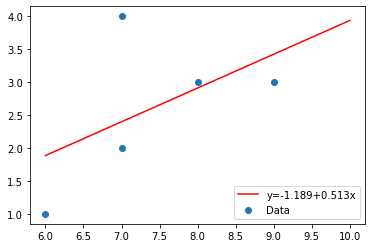

In [651]:
X = np.array([[6], [7], [8], [9], [7]])
y = np.array([1, 2, 3, 3, 4])

# instantiate an least squares object, fit to data, predict data
model = LeastSquaresGradient()

print('Fitting the model...\n')
model.fit(X, y, [0, 0], alpha = 0.001, h = 0.001, tolerance = 0.01, maxIterations = 100000,l1=0.001,l2=0.01)

predictions = model.predict(X)

# print the predictions
print('\nThe predicted y values are', predictions.T[0])

# print the real y values
print('The real y values are', y)

# print the w values
parameters = model.w
print('The w values are', parameters)

# plot the training points
plt.scatter(X, y, label = 'Data')

# plot the fitted model with the data
xModel = np.linspace(6,10,100)
yModel = parameters[0] + parameters[1]*xModel

# write a string for the formula
lineFormula = 'y={:.3f}+{:.3f}x'.format(parameters[0], parameters[1])

# plot the model
plt.plot(xModel, yModel, 'r', label = lineFormula)

# add a legend
plt.legend()

# return quality metrics
print('\nThe r^2 score is', r2_score(y, predictions))
print('The mean squared error is', mean_squared_error(y, predictions))
print('The mean absolute error is', mean_absolute_error(y, predictions),'\n')


**Question 4**<br>
Load  the  diabetes  dataset  from  scikit-learn.Tune  the  hyperparameters  of  the  model  
to predict disease progression as well as possible.  Run the model at least ten different options 
for the hyperparameters, and document your performance.

In [672]:
# import the data from the csv file to an numpy array
X,y= datasets.load_diabetes(return_X_y=True)
# split the data into training and test sets
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size = 0.40)
testX,DevX,testY,DevY=train_test_split(testX, testY, test_size = 0.50)
trainX = scale(trainX)
testX = scale(testX)


## Train (L1=0 ,L2 =0)

In [673]:
# instantiate a least squares model
model = LeastSquaresGradient()

# fit the model to the training data (find the w parameters)
print('Fitting the model...\n')
model.fit(trainX, trainY, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], alpha = 0.0001, h = 0.001, tolerance = 0.01, maxIterations = 100000,l1= 0,l2=0)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(trainX)

# print the coefficient of determination r^2
print('\nThe r^2 score is', r2_score(trainY, trainPredictions))

# print quality metrics
print('\nThe mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

print('\nThe mean absolute error on the test set is', mean_absolute_error(testY, predictions), '\n')

Fitting the model...

Gradient descent took 21658 iterations to converge
The norm of the gradient is 0.009996537923547221

The r^2 score is 0.5418186172122185

The mean absolute error on the training set is 44.164393465915026

The mean absolute error on the test set is 46.445170087163746 



## Dev 1 (L1=0.5 ,L2=2)
For tuning hyperparameters assume that all l1 and l2 will be between the range 0.5-, alpha =0.0001, tolerance=0.01, ,maxIterations=1000000 

In [654]:
print('Fitting the model...\n')
model.fit(DevX, DevY, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], alpha = 0.0001, h = 0.001, tolerance = 0.01, maxIterations = 100000,l1= 0.5,l2=2)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(DevX)

# print the coefficient of determination r^2
print('\nThe r^2 score is', r2_score(DevY, trainPredictions))

# print quality metrics
print('\nThe mean absolute error on the training set is', mean_absolute_error(DevY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print quality metrics
print('\nThe mean absolute error on the test set is', mean_absolute_error(testY, predictions), '\n')

Fitting the model...

Gradient descent took 23954 iterations to converge
The norm of the gradient is 0.009999240317825892

The r^2 score is 0.1927902247237061

The mean absolute error on the training set is 60.230602112496264

The mean absolute error on the test set is 179.6164722761153 



## Dev 2 (L1=2, L2=2)

In [655]:
print('Fitting the model...\n')
model.fit(DevX, DevY, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], alpha = 0.0001, h = 0.001, tolerance = 0.01, maxIterations = 100000,l1= 2,l2=2)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(DevX)

# print the coefficient of determination r^2
print('\nThe r^2 score is', r2_score(DevY, trainPredictions))

# print quality metrics
print('\nThe mean absolute error on the training set is', mean_absolute_error(DevY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print quality metrics
print('\nThe mean absolute error on the test set is', mean_absolute_error(testY, predictions), '\n')

Fitting the model...

Gradient descent took 23916 iterations to converge
The norm of the gradient is 0.009997368342407604

The r^2 score is 0.19200001389330734

The mean absolute error on the training set is 60.25706971390761

The mean absolute error on the test set is 178.6055006781228 



## Dev 3 (L1=3, L2=4)

In [656]:
print('Fitting the model...\n')
model.fit(DevX, DevY, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], alpha = 0.0001, h = 0.001, tolerance = 0.01, maxIterations = 100000,l1= 3,l2=4)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(DevX)

# print the coefficient of determination r^2
print('\nThe r^2 score is', r2_score(DevY, trainPredictions))

# print quality metrics
print('\nThe mean absolute error on the training set is', mean_absolute_error(DevY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print quality metrics
print('\nThe mean absolute error on the test set is', mean_absolute_error(testY, predictions), '\n')

Fitting the model...

Gradient descent took 12642 iterations to converge
The norm of the gradient is 0.009995100171528562

The r^2 score is 0.10804739695289134

The mean absolute error on the training set is 62.97530350291266

The mean absolute error on the test set is 94.56833558694953 



## Dev 4 (L1=4, L2=3)

In [659]:
print('Fitting the model...\n')
model.fit(DevX, DevY, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], alpha = 0.001, h = 0.001, tolerance = 0.01, maxIterations = 100000,l1= 0.0001,l2=0.05)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(DevX)

# print the coefficient of determination r^2
print('\nThe r^2 score is', r2_score(DevY, trainPredictions))

# print quality metrics
print('\nThe mean absolute error on the training set is', mean_absolute_error(DevY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print quality metrics
print('\nThe mean absolute error on the test set is', mean_absolute_error(testY, predictions), '\n')

Fitting the model...

Gradient descent took 52185 iterations to converge
The norm of the gradient is 0.009999248953139604

The r^2 score is 0.5986612467916204

The mean absolute error on the training set is 42.47971940550741

The mean absolute error on the test set is 904.1055049130359 



## Dev 5 (L1=1.5, L2=2)

In [660]:
print('Fitting the model...\n')
model.fit(DevX, DevY, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], alpha = 0.0001, h = 0.001, tolerance = 0.01, maxIterations = 100000,l1= 1.5,l2=2)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(DevX)

# print the coefficient of determination r^2
print('\nThe r^2 score is', r2_score(DevY, trainPredictions))

# print quality metrics
print('\nThe mean absolute error on the training set is', mean_absolute_error(DevY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print quality metrics
print('\nThe mean absolute error on the test set is', mean_absolute_error(testY, predictions), '\n')

Fitting the model...

Gradient descent took 23926 iterations to converge
The norm of the gradient is 0.009996791178795534

The r^2 score is 0.1922635477443806

The mean absolute error on the training set is 60.247924394315234

The mean absolute error on the test set is 178.9424909256749 



## Dev 6 (L1=0.5, L2=1)

In [665]:
print('Fitting the model...\n')
model.fit(DevX, DevY, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], alpha = 0.0001, h = 0.001, tolerance = 0.01, maxIterations = 100000,l1= 0.5,l2=1)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(DevX)

# print the coefficient of determination r^2
print('\nThe r^2 score is', r2_score(DevY, trainPredictions))

# print quality metrics
print('\nThe mean absolute error on the training set is', mean_absolute_error(DevY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print quality metrics
print('\nThe mean absolute error on the test set is', mean_absolute_error(testY, predictions), '\n')

Fitting the model...

Gradient descent took 44250 iterations to converge
The norm of the gradient is 0.009999597174032137

The r^2 score is 0.29423911302113537

The mean absolute error on the training set is 56.82539009223976

The mean absolute error on the test set is 303.06978262250453 



## Dev 7 (L1=6,L2=5)

In [678]:
print('Fitting the model...\n')
model.fit(DevX, DevY, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], alpha = 0.0001, h = 0.001, tolerance = 0.01, maxIterations = 100000,l1= 6,l2=5)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(DevX)

# print the coefficient of determination r^2
print('\nThe r^2 score is', r2_score(DevY, trainPredictions))

# print quality metrics
print('\nThe mean absolute error on the training set is', mean_absolute_error(DevY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print quality metrics
print('\nThe mean absolute error on the test set is', mean_absolute_error(testY, predictions), '\n')

Fitting the model...

Gradient descent took 9688 iterations to converge
The norm of the gradient is 0.009995720829643224

The r^2 score is 0.06598358375272029

The mean absolute error on the training set is 48.264904287654

The mean absolute error on the test set is 67.01238327901548 



## Dev 8 (L1=6,L2=6)

In [667]:
print('Fitting the model...\n')
model.fit(DevX, DevY, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], alpha = 0.0001, h = 0.001, tolerance = 0.01, maxIterations = 100000,l1= 6,l2=6)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(DevX)

# print the coefficient of determination r^2
print('\nThe r^2 score is', r2_score(DevY, trainPredictions))

# print quality metrics
print('\nThe mean absolute error on the training set is', mean_absolute_error(DevY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print quality metrics
print('\nThe mean absolute error on the test set is', mean_absolute_error(testY, predictions), '\n')

Fitting the model...

Gradient descent took 8642 iterations to converge
The norm of the gradient is 0.009997997561345983

The r^2 score is 0.06538666218538025

The mean absolute error on the training set is 64.19227394431049

The mean absolute error on the test set is 63.65641288568515 



## Dev 9 (L1=6,L2=2)

In [668]:
print('Fitting the model...\n')
model.fit(DevX, DevY, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], alpha = 0.0001, h = 0.001, tolerance = 0.01, maxIterations = 100000,l1= 6,l2=2)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(DevX)

# print the coefficient of determination r^2
print('\nThe r^2 score is', r2_score(DevY, trainPredictions))

# print quality metrics
print('\nThe mean absolute error on the training set is', mean_absolute_error(DevY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print quality metrics
print('\nThe mean absolute error on the test set is', mean_absolute_error(testY, predictions), '\n')

Fitting the model...

Gradient descent took 23891 iterations to converge
The norm of the gradient is 0.009997183787197795

The r^2 score is 0.1898870470966818

The mean absolute error on the training set is 60.330231350429976

The mean absolute error on the test set is 175.90958666227 



## Dev 10 (L1=1.5,L2=3)

In [675]:
print('Fitting the model...\n')
model.fit(DevX, DevY, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], alpha = 0.0001, h = 0.001, tolerance = 0.01, maxIterations = 100000,l1= 1.5,l2=3)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(DevX)

# print the coefficient of determination r^2
print('\nThe r^2 score is', r2_score(DevY, trainPredictions))

# print quality metrics
print('\nThe mean absolute error on the training set is', mean_absolute_error(DevY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print quality metrics
print('\nThe mean absolute error on the test set is', mean_absolute_error(testY, predictions), '\n')

Fitting the model...

Gradient descent took 15519 iterations to converge
The norm of the gradient is 0.009996618659717238

The r^2 score is 0.1194593957552238

The mean absolute error on the training set is 47.01419774097202

The mean absolute error on the test set is 97.34393694761467 



## Test (L1=6,L2=6)

In [676]:
print('Fitting the model...\n')
model.fit(testX, testY, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], alpha = 0.0001, h = 0.001, tolerance = 0.01, maxIterations = 100000,l1= 6,l2=6)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(testX)

# print the coefficient of determination r^2
print('\nThe r^2 score is', r2_score(testY, trainPredictions))

# print quality metrics
print('\nThe mean absolute error on the training set is', mean_absolute_error(testY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print quality metrics
print('\nThe mean absolute error on the test set is', mean_absolute_error(testY, predictions), '\n')

Fitting the model...

Gradient descent took 7167 iterations to converge
The norm of the gradient is 0.009990113866064947

The r^2 score is 0.5615833888521693

The mean absolute error on the training set is 43.72394642578152

The mean absolute error on the test set is 43.72394642578152 



Observation:
It was observed during the tuning of hyperparameters of the models that the higher the parameters are for both l1 and l2 the less amount of iterations would be needed for the gradient to converge.

**Question 5**<br>
Proveσ′(z) =σ(z)(1−σ(z)) for the sigmoid functionσ<br>
![alt text](NN_hw1_q5.png)

**Question 6**<br>
Repeat problems 1-2 with the logistic binary classifier.

**Question 6 Part 1**<br>
![alt text](NN_hw1_q1P1.png)

**Question 6 Part 2**

In [617]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [618]:
class LogisticClassifierGradient:
        
    # fit the model to the data
    def fit(self, X, y, w0, alpha, h, tolerance, maxIterations):
        self.n = X.shape[0]
        self.d = X.shape[1]
        self.h = h
        self.alpha = alpha
        self.initialGuess = w0
        
        # standardize the data
        X = self.standardize(X)
        
        # save the training data and add a column of 1s to it
        self.data = np.hstack((np.ones([self.n, 1]), X))
        
        # save the training labels
        self.outputs = y
        
        # find the w values that minimize the sum of squared errors via gradient descent
        X = self.data
        
        L = lambda w: (self.sigmoid((X @ w)).T - y.T) @ (self.sigmoid(X @ w) - y)
        self.w = self.gradientDescent(L, self.initialGuess, self.alpha, self.h, tolerance, maxIterations)
                
    # predict the output from testing data
    def predict(self, X):        
        # standardize the data
        X = self.standardize(X)
        
        # initialize an empty matrix to store the predicted outputs
        yPredicted = np.empty([X.shape[0],1])
        
        # append a column of ones at the beginning of X
        X = np.hstack((np.ones([X.shape[0],1]), X))
        
        # apply the function f with the values of w from the fit function to each testing datapoint (rows of X)
        for row in range(X.shape[0]):
            yPredicted[row] = np.round(self.sigmoid(self.w @ X[row,]))
            
        return yPredicted

    # run gradient descent to minimize the loss function
    def gradientDescent(self, f, x0, alpha, h, tolerance, maxIterations):
        # set x equal to the initial guess
        x = x0
        x=np.array(x0).T
        x = x.astype('float64')
        # take up to maxIterations number of steps
        for counter in range(maxIterations):
            # update the gradient
            gradient = -2* self.data.T @ ((self.outputs - self.sigmoid(self.data @ x)) * (1-self.sigmoid(self.data @ x)* self.sigmoid(self.data @ x)))
            #self.computeGradient(f, x, h)
            
            # stop if the norm of the gradient is near 0
            if np.linalg.norm(gradient) < tolerance:
                print('Gradient descent took', counter, 'iterations to converge')
                print('The norm of the gradient is', np.linalg.norm(gradient))
                # return the approximate critical value x
                return x

            # if we do not converge, print a message
            elif counter == maxIterations-1:
                print("Gradient descent failed")
                print('The norm of the gradient is', np.linalg.norm(gradient))
                # return x, sometimes it is still pretty good
                return x

            # take a step in the opposite direction as the gradient
            x -= alpha*gradient
            
   
    
    def sigmoid(self, z): return 1.0 / (1 + np.exp(-z))
    
    def standardize(self, X):
        n = X.shape[0]
        
        # normalize all the n features of X.
        for i in range(n):
            X = (X - X.mean(axis=0))/X.std(axis=0)
        return X

### Test

In [598]:
# breastcancer = datasets.load_breast_cancer()

# # find the data and labels
# X = breastcancer.data
# Y = breastcancer.target

# # split the data into train and test sets
# trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

# # build the Bayes classifier
# model = LogisticClassifierGradient()

# # fit the Bayes classifier to the training data
# print(trainX.shape,trainY.shape)
# model.fit(trainX, trainY, [0] * (X.shape[1] + 1), alpha = 0.001, h = 0.001,
#           tolerance = 0.001, maxIterations = 10000)

# # predict the labels of the training set
# predictedY = model.predict(trainX)

# # print quality metrics
# print('\nTrain Classification Report:\n\n', classification_report(trainY, predictedY))

# # predict the labels of the test set
# predictedY = model.predict(testX)

# # print quality metrics
# print('\nTest Classification Report:\n\n', classification_report(testY, predictedY))
# print('\nTest Confusion Matrix:\n')

# sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

**Question 7**<br>
Download and read in a credit default dataset from the UCI Machine Learning Repository.Tune the hyperparameters of the logistic binary classifier to predict credit defaults as well aspossible. 
Run the model at least ten different options for the hyperparameters, and documentyour performance.

In [688]:
class LogisticClassifierGradient:
        
    # fit the model to the data
    def fit(self, X, y, w0, alpha, h, tolerance, maxIterations,l1,l2):
        self.n = X.shape[0]
        self.d = X.shape[1]
        self.h = h
        self.alpha = alpha
        self.initialGuess = w0
        self.l1=l1;
        self.l2=l2;
        
        # standardize the data
        X = self.standardize(X)
        
        # save the training data and add a column of 1s to it
        self.data = np.hstack((np.ones([self.n, 1]), X))
        
        # save the training labels
        self.outputs = y
        
        # find the w values that minimize the sum of squared errors via gradient descent
        X = self.data
        
        L = lambda w: (self.sigmoid((X @ w)).T - y.T) @ (self.sigmoid(X @ w) - y)+ self.l1 *np.sum(np.abs(w)) + self.l2 * w.T @ w
        self.w = self.gradientDescent(L, self.initialGuess, self.alpha, self.h, tolerance, maxIterations)
                
    # predict the output from testing data
    def predict(self, X):        
        # standardize the data
        X = self.standardize(X)
        
        # initialize an empty matrix to store the predicted outputs
        yPredicted = np.empty([X.shape[0],1])
        
        # append a column of ones at the beginning of X
        X = np.hstack((np.ones([X.shape[0],1]), X))
        
        # apply the function f with the values of w from the fit function to each testing datapoint (rows of X)
        for row in range(X.shape[0]):
            yPredicted[row] = np.round(self.sigmoid(self.w @ X[row,]))
            
        return yPredicted

    # run gradient descent to minimize the loss function
    def gradientDescent(self, f, x0, alpha, h, tolerance, maxIterations):
        # set x equal to the initial guess
        x = x0
        x=np.array(x0).T
        x = x.astype('float64')
        # take up to maxIterations number of steps
        for counter in range(maxIterations):
            # update the gradient
            for ele in x:
                if abs(ele) < 0.0000000001:
                    appl= 0
                if abs(ele) > 0.0000000001:
                    appl= x/abs(x)
            gradient = -2* self.data.T @ ((self.outputs - self.sigmoid(self.data @ x)) * (1-self.sigmoid(self.data @ x)* self.sigmoid(self.data @ x)))+ 2 *self.l2 * x + self.l1 * appl
            
            # stop if the norm of the gradient is near 0
            if np.linalg.norm(gradient) < tolerance:
                print('Gradient descent took', counter, 'iterations to converge')
                print('The norm of the gradient is', np.linalg.norm(gradient))
                # return the approximate critical value x
                return x

            # if we do not converge, print a message
            elif counter == maxIterations-1:
                print("Gradient descent failed")
                print('The norm of the gradient is', np.linalg.norm(gradient))
                # return x, sometimes it is still pretty good
                return x

            # take a step in the opposite direction as the gradient
            x -= alpha*gradient
            
   
    
    def sigmoid(self, z): return 1.0 / (1 + np.exp(-z))
    
    def standardize(self, X):
        n = X.shape[0]
        
        # normalize all the n features of X.
        for i in range(n):
            X = (X - X.mean(axis=0))/X.std(axis=0)
        return X

In [486]:
# breastcancer = datasets.load_breast_cancer()

# # find the data and labels
# X = breastcancer.data
# Y = breastcancer.target
# # split the data into train and test sets
# trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

# # build the Bayes classifier
# model = LogisticClassifierGradient()

# # fit the Bayes classifier to the training data
# print(trainX.shape,trainY.shape)
# model.fit(trainX, trainY, [0] * (X.shape[1] + 1), alpha = 0.001, h = 0.001,
#           tolerance = 0.001, maxIterations = 10000,l1=1,l2=3)

# # predict the labels of the training set
# predictedY = model.predict(trainX)

# # print quality metrics
# print('\nTrain Classification Report:\n\n', classification_report(trainY, predictedY))

# # predict the labels of the test set
# predictedY = model.predict(testX)

# # print quality metrics
# print('\nTest Classification Report:\n\n', classification_report(testY, predictedY))
# print('\nTest Confusion Matrix:\n')

# sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

In [623]:
data = pandas.read_csv('/Users/juliannweir-jackson/Documents/default of credit card clients.csv',sep = ',')  
data = data.dropna()
data = data.to_numpy() 

# print data 
X = np.array(data[1:,1:24], dtype = float) 
y = np.array(data[1:,24],dtype = float) 
#print(X.shape)
#y=np.reshape(y,(len(y),1))
#print (y.shape)
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.40)
testX,DevX,testY,DevY=train_test_split(testX, testY, test_size = 0.50)

#print(trainX.shape)



## Train (L1=0,L2=0)

Gradient descent failed
The norm of the gradient is 6928.911783890901

Train Classification Report:

               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89     14015
         1.0       0.64      0.39      0.48      3985

    accuracy                           0.82     18000
   macro avg       0.74      0.66      0.69     18000
weighted avg       0.80      0.82      0.80     18000


Test Classification Report:

               precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      4713
         1.0       0.61      0.38      0.47      1287

    accuracy                           0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.79      0.81      0.80      6000


Test Confusion Matrix:



<AxesSubplot:>

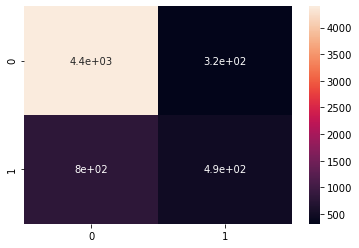

In [624]:
# build the Bayes classifier
model = LogisticClassifierGradient()

# fit the Bayes classifier to the training data
#print(trainX.shape,trainY.shape)
model.fit(trainX, trainY, [0] * (X.shape[1] + 1), alpha = 0.0001, h = 0.001,
          tolerance = 0.001, maxIterations = 100000,l1=0,l2=0)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTrain Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTest Classification Report:\n\n', classification_report(testY, predictedY))
print('\nTest Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

## Dev 1 (L1=1,L2=3)

Gradient descent failed
The norm of the gradient is 1.778765354957597

Train Classification Report:

               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       0.0
        25.0       0.00      0.00      0.00       1.0
        55.0       0.00      0.00      0.00       1.0
        59.0       0.00      0.00      0.00       1.0
        63.0       0.00      0.00      0.00       1.0
        64.0       0.00      0.00      0.00       1.0
        67.0       0.00      0.00      0.00       1.0
        68.0       0.00      0.00      0.00       2.0
        70.0       0.00      0.00      0.00       1.0
        71.0       0.00      0.00      0.00       2.0
        72.0       0.00      0.00      0.00       1.0
        77.0       0.00      0.00      0.00       1.0
        79.0       0.00      0.00      0.00       1.0
        83.0       0.00      0.00      0.00       2.0
        84.0       0.00      0.00      0.00       2.0
        85.0       0.00      0.00

/Users/juliannweir-jackson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliannweir-jackson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliannweir-jackson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

<AxesSubplot:>

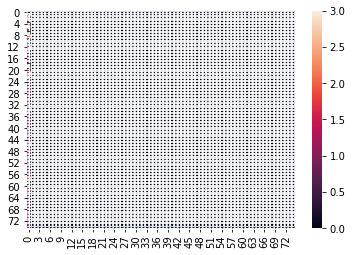

In [694]:
# build the Bayes classifier
model = LogisticClassifierGradient()

# fit the Bayes classifier to the training data
#print(trainX.shape,trainY.shape)
model.fit(DevX, DevY, [0] * (X.shape[1] + 1), alpha = 0.001, h = 0.001,
          tolerance = 0.01, maxIterations = 10000,l1=1,l2=3)

# predict the labels of the training set
predictedY = model.predict(DevX)

# print quality metrics
print('\nTrain Classification Report:\n\n', classification_report(DevY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTest Classification Report:\n\n', classification_report(testY, predictedY))
print('\nTest Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

## Dev 2 (L1=0.5,L2=1)

Gradient descent failed
The norm of the gradient is 0.2841172020740257

Train Classification Report:

               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       0.0
        25.0       0.00      0.00      0.00       1.0
        55.0       0.00      0.00      0.00       1.0
        59.0       0.00      0.00      0.00       1.0
        63.0       0.00      0.00      0.00       1.0
        64.0       0.00      0.00      0.00       1.0
        67.0       0.00      0.00      0.00       1.0
        68.0       0.00      0.00      0.00       2.0
        70.0       0.00      0.00      0.00       1.0
        71.0       0.00      0.00      0.00       2.0
        72.0       0.00      0.00      0.00       1.0
        77.0       0.00      0.00      0.00       1.0
        79.0       0.00      0.00      0.00       1.0
        83.0       0.00      0.00      0.00       2.0
        84.0       0.00      0.00      0.00       2.0
        85.0       0.00      0.0

/Users/juliannweir-jackson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliannweir-jackson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliannweir-jackson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

<AxesSubplot:>

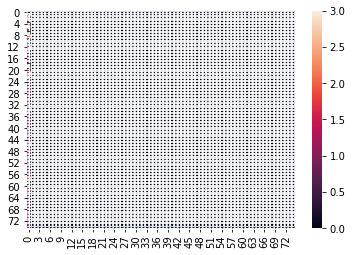

In [687]:
# build the Bayes classifier
model = LogisticClassifierGradient()

# fit the Bayes classifier to the training data
#print(trainX.shape,trainY.shape)
model.fit(DevX, DevY, [0] * (X.shape[1] + 1), alpha = 0.001, h = 0.001,
          tolerance = 0.001, maxIterations = 10000,l1=0.5,l2=1)

# predict the labels of the training set
predictedY = model.predict(DevX)

# print quality metrics
print('\nTrain Classification Report:\n\n', classification_report(DevY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTest Classification Report:\n\n', classification_report(testY, predictedY))
print('\nTest Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

## Dev 3 (L1=10,L2=10)

Gradient descent failed
The norm of the gradient is 24.105587355708053

Train Classification Report:

               precision    recall  f1-score   support

         0.0       0.81      0.97      0.89      4636
         1.0       0.73      0.25      0.37      1364

    accuracy                           0.81      6000
   macro avg       0.77      0.61      0.63      6000
weighted avg       0.80      0.81      0.77      6000


Test Classification Report:

               precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      4713
         1.0       0.66      0.23      0.34      1287

    accuracy                           0.81      6000
   macro avg       0.74      0.60      0.61      6000
weighted avg       0.79      0.81      0.77      6000


Test Confusion Matrix:



<AxesSubplot:>

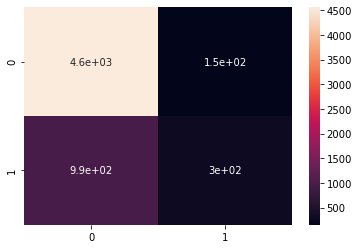

In [627]:
# build the Bayes classifier
model = LogisticClassifierGradient()

# fit the Bayes classifier to the training data
#print(trainX.shape,trainY.shape)
model.fit(DevX, DevY, [0] * (X.shape[1] + 1), alpha = 0.0001, h = 0.001,
          tolerance = 0.001, maxIterations = 10000,l1=10,l2=10)

# predict the labels of the training set
predictedY = model.predict(DevX)

# print quality metrics
print('\nTrain Classification Report:\n\n', classification_report(DevY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTest Classification Report:\n\n', classification_report(testY, predictedY))
print('\nTest Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

## Dev 4 (L1=3,L2=1)

Gradient descent took 3749 iterations to converge
The norm of the gradient is 0.0009992304521378097

Train Classification Report:

               precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      4656
         1.0       0.70      0.22      0.33      1344

    accuracy                           0.80      6000
   macro avg       0.75      0.59      0.61      6000
weighted avg       0.79      0.80      0.76      6000


Test Classification Report:

               precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      4693
         1.0       0.70      0.22      0.34      1307

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.61      6000
weighted avg       0.79      0.81      0.77      6000


Test Confusion Matrix:



<AxesSubplot:>

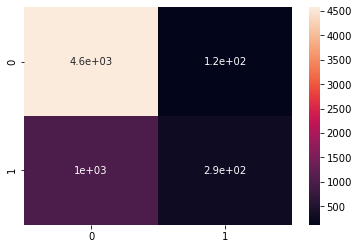

In [509]:
# build the Bayes classifier
model = LogisticClassifierGradient()

# fit the Bayes classifier to the training data
#print(trainX.shape,trainY.shape)
model.fit(DevX, DevY, [0] * (X.shape[1] + 1), alpha = 0.0001, h = 0.001,
          tolerance = 0.001, maxIterations = 10000,l1=3,l2=1)

# predict the labels of the training set
predictedY = model.predict(DevX)

# print quality metrics
print('\nTrain Classification Report:\n\n', classification_report(DevY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTest Classification Report:\n\n', classification_report(testY, predictedY))
print('\nTest Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

## Dev 5 (L1=05,L2=0.5)

Gradient descent took 4408 iterations to converge
The norm of the gradient is 0.0009998371744031173

Train Classification Report:

               precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      4656
         1.0       0.69      0.22      0.33      1344

    accuracy                           0.80      6000
   macro avg       0.75      0.59      0.61      6000
weighted avg       0.78      0.80      0.76      6000


Test Classification Report:

               precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      4693
         1.0       0.70      0.23      0.34      1307

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000


Test Confusion Matrix:



<AxesSubplot:>

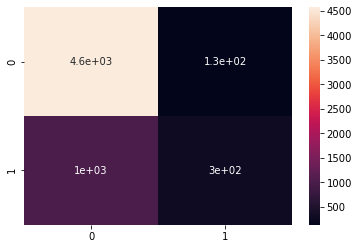

In [492]:
# build the Bayes classifier
model = LogisticClassifierGradient()

# fit the Bayes classifier to the training data
#print(trainX.shape,trainY.shape)
model.fit(DevX, DevY, [0] * (X.shape[1] + 1), alpha = 0.0001, h = 0.001,
          tolerance = 0.001, maxIterations = 10000,l1=0.5,l2=0.5)

# predict the labels of the training set
predictedY = model.predict(DevX)

# print quality metrics
print('\nTrain Classification Report:\n\n', classification_report(DevY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTest Classification Report:\n\n', classification_report(testY, predictedY))
print('\nTest Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

## Dev 6 (L1=2,L2=0.5)

Gradient descent took 3871 iterations to converge
The norm of the gradient is 0.0009998887116798665

Train Classification Report:

               precision    recall  f1-score   support

         0.0       0.81      0.97      0.89      4683
         1.0       0.69      0.20      0.31      1317

    accuracy                           0.81      6000
   macro avg       0.75      0.59      0.60      6000
weighted avg       0.79      0.81      0.76      6000


Test Classification Report:

               precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      4675
         1.0       0.71      0.24      0.36      1325

    accuracy                           0.81      6000
   macro avg       0.77      0.61      0.63      6000
weighted avg       0.80      0.81      0.77      6000


Test Confusion Matrix:



<AxesSubplot:>

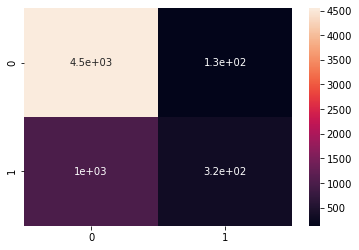

In [420]:
# build the Bayes classifier
model = LogisticClassifierGradient()

# fit the Bayes classifier to the training data
#print(trainX.shape,trainY.shape)
model.fit(DevX, DevY, [0] * (X.shape[1] + 1), alpha = 0.0001, h = 0.001,
          tolerance = 0.001, maxIterations = 10000,l1=2,l2=.5)

# predict the labels of the training set
predictedY = model.predict(DevX)

# print quality metrics
print('\nTrain Classification Report:\n\n', classification_report(DevY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTest Classification Report:\n\n', classification_report(testY, predictedY))
print('\nTest Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

## Dev 7 (L1=2,L2=2)

Gradient descent took 3546 iterations to converge
The norm of the gradient is 0.0009998665341330636

Train Classification Report:

               precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      4656
         1.0       0.70      0.22      0.33      1344

    accuracy                           0.80      6000
   macro avg       0.75      0.59      0.61      6000
weighted avg       0.79      0.80      0.76      6000


Test Classification Report:

               precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      4693
         1.0       0.70      0.22      0.34      1307

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000


Test Confusion Matrix:



<AxesSubplot:>

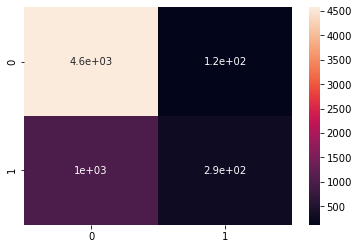

In [503]:
# build the Bayes classifier
model = LogisticClassifierGradient()

# fit the Bayes classifier to the training data
#print(trainX.shape,trainY.shape)
model.fit(DevX, DevY, [0] * (X.shape[1] + 1), alpha = 0.0001, h = 0.001,
          tolerance = 0.001, maxIterations = 10000,l1=2,l2=2)

# predict the labels of the training set
predictedY = model.predict(DevX)

# print quality metrics
print('\nTrain Classification Report:\n\n', classification_report(DevY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTest Classification Report:\n\n', classification_report(testY, predictedY))
print('\nTest Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

## Dev 8 (L1=1,L2=0.5)

Gradient descent took 4317 iterations to converge
The norm of the gradient is 0.0009992281683612633

Train Classification Report:

               precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      4656
         1.0       0.69      0.22      0.33      1344

    accuracy                           0.80      6000
   macro avg       0.75      0.59      0.61      6000
weighted avg       0.78      0.80      0.76      6000


Test Classification Report:

               precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      4693
         1.0       0.70      0.23      0.34      1307

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000


Test Confusion Matrix:



<AxesSubplot:>

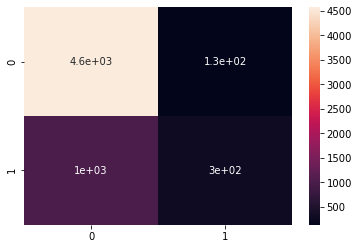

In [502]:
# build the Bayes classifier
model = LogisticClassifierGradient()

# fit the Bayes classifier to the training data
#print(trainX.shape,trainY.shape)
model.fit(DevX, DevY, [0] * (X.shape[1] + 1), alpha = 0.0001, h = 0.001,
          tolerance = 0.001, maxIterations = 10000,l1=1.0,l2=0.5)

# predict the labels of the training set
predictedY = model.predict(DevX)

# print quality metrics
print('\nTrain Classification Report:\n\n', classification_report(DevY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTest Classification Report:\n\n', classification_report(testY, predictedY))
print('\nTest Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

## Dev 9 (L1=2,L2=4)

Gradient descent took 2991 iterations to converge
The norm of the gradient is 0.0009973441923109756

Train Classification Report:

               precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      4656
         1.0       0.69      0.22      0.33      1344

    accuracy                           0.80      6000
   macro avg       0.75      0.59      0.61      6000
weighted avg       0.78      0.80      0.76      6000


Test Classification Report:

               precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      4693
         1.0       0.70      0.22      0.34      1307

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000


Test Confusion Matrix:



<AxesSubplot:>

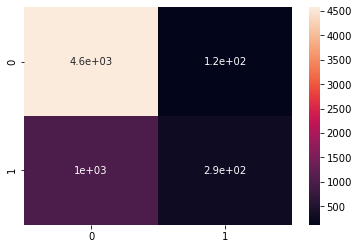

In [500]:
# build the Bayes classifier
model = LogisticClassifierGradient()

# fit the Bayes classifier to the training data
#print(trainX.shape,trainY.shape)
model.fit(DevX, DevY, [0] * (X.shape[1] + 1), alpha = 0.0001, h = 0.001,
          tolerance = 0.001, maxIterations = 10000,l1=2,l2=4)

# predict the labels of the training set
predictedY = model.predict(DevX)

# print quality metrics
print('\nTrain Classification Report:\n\n', classification_report(DevY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTest Classification Report:\n\n', classification_report(testY, predictedY))
print('\nTest Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

## Dev 10 (L1=2,L2=3)

Gradient descent took 3244 iterations to converge
The norm of the gradient is 0.0009975016190855526

Train Classification Report:

               precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      4656
         1.0       0.70      0.22      0.33      1344

    accuracy                           0.80      6000
   macro avg       0.75      0.59      0.61      6000
weighted avg       0.79      0.80      0.76      6000


Test Classification Report:

               precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      4693
         1.0       0.70      0.22      0.34      1307

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000


Test Confusion Matrix:



<AxesSubplot:>

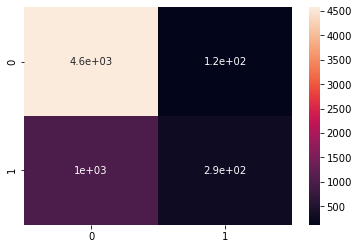

In [498]:
# build the Bayes classifier
model = LogisticClassifierGradient()

# fit the Bayes classifier to the training data
#print(trainX.shape,trainY.shape)
model.fit(DevX, DevY, [0] * (X.shape[1] + 1), alpha = 0.0001, h = 0.001,
          tolerance = 0.001, maxIterations = 10000,l1=2,l2=3)

# predict the labels of the training set
predictedY = model.predict(DevX)

# print quality metrics
print('\nTrain Classification Report:\n\n', classification_report(DevY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTest Classification Report:\n\n', classification_report(testY, predictedY))
print('\nTest Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

## Test (L1=1,L2=3)

Gradient descent took 3198 iterations to converge
The norm of the gradient is 0.0009992648541538181

Train Classification Report:

               precision    recall  f1-score   support

         0.0       0.82      0.98      0.89      4693
         1.0       0.72      0.22      0.33      1307

    accuracy                           0.81      6000
   macro avg       0.77      0.60      0.61      6000
weighted avg       0.80      0.81      0.77      6000


Test Classification Report:

               precision    recall  f1-score   support

         0.0       0.82      0.98      0.89      4693
         1.0       0.72      0.22      0.33      1307

    accuracy                           0.81      6000
   macro avg       0.77      0.60      0.61      6000
weighted avg       0.80      0.81      0.77      6000


Test Confusion Matrix:



<AxesSubplot:>

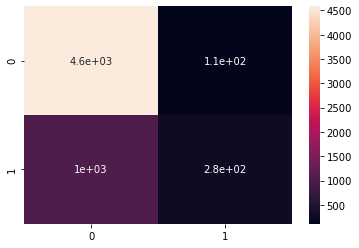

In [510]:
# build the Bayes classifier
model = LogisticClassifierGradient()

# fit the Bayes classifier to the training data
#print(trainX.shape,trainY.shape)
model.fit(testX, testY, [0] * (X.shape[1] + 1), alpha = 0.0001, h = 0.001,
          tolerance = 0.001, maxIterations = 10000,l1=1,l2=3)

# predict the labels of the training set
predictedY = model.predict(testX)

# print quality metrics
print('\nTrain Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTest Classification Report:\n\n', classification_report(testY, predictedY))
print('\nTest Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)